In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/Marketing_data.csv")
df.head(2)

,Unnamed: 0,Menu Item,Modifiers,Price,Qty,Discount,Net,Tax,Total,Voided?,Reason,Refund Qty,Refund,Last 4 Card Digits,Order Date,Tip,Gratuity
0,0,Margarita Rock Flight,Salt,$24.00,1.0,$0.00,$24.00,$2.250,$26.25,False,NaN,0,$0.00,3108.0,2023-12-08 18:46:00,$6.86,$45.71
1,1,Margarita Rock Flight,Salt,$24.00,1.0,$0.00,$24.00,$2.250,$26.25,False,NaN,0,$0.00,3108.0,2023-12-08 18:46:00,$6.86,$45.71


## Plot - 1
- Analysis shows customers who only came once mostly bought drinks only.

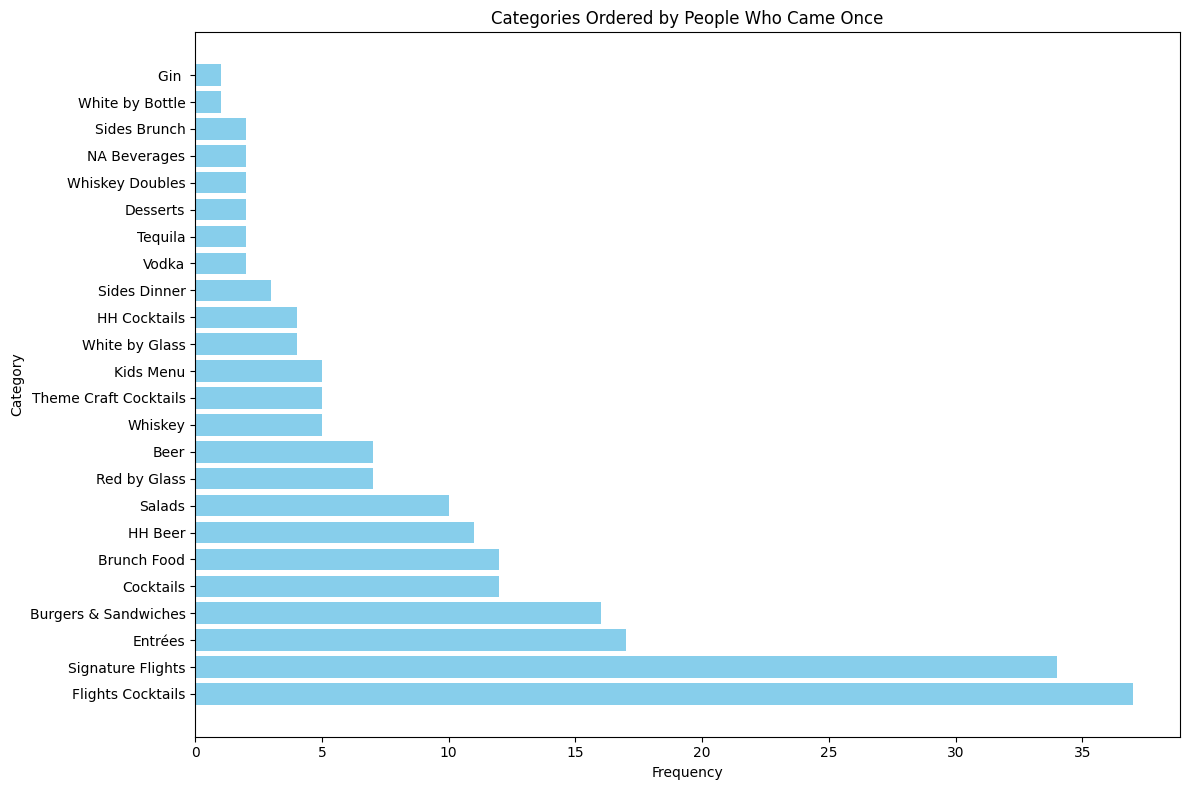

In [3]:
item_data = pd.read_excel('data/Campbell Menu Data - 2.xlsx', index_col=0)

item_data.rename(columns={"itemName": "Menu Item"}, inplace=True)
ungrouped_data = pd.read_csv("data/Marketing_data.csv")
category_dict = item_data.groupby('Category')['Menu Item'].apply(list).to_dict()
itemp = item_data.groupby('Menu Item')['itemPrice'].apply(list).to_dict()

for category, items in category_dict.items():
    ungrouped_data.loc[ungrouped_data['Menu Item'].isin(items), 'Category'] = category

for item, price in itemp.items():
  ungrouped_data.loc[ungrouped_data['Menu Item'] == item, 'ItemPrice'] = price[0]
df=ungrouped_data

nique_people = df['Last 4 Card Digits'].unique()

people_came_once = df['Last 4 Card Digits'].value_counts()[df['Last 4 Card Digits'].value_counts() == 1].index

unique_orders = df[df['Last 4 Card Digits'].isin(people_came_once)]['Category'].value_counts()

plt.figure(figsize=(12, 8))

plt.barh(unique_orders.index, unique_orders.values, color='skyblue') 
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Categories Ordered by People Who Came Once')

plt.tight_layout()
plt.show()

## Plot - 2
- Special days with lowest amount of sales

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


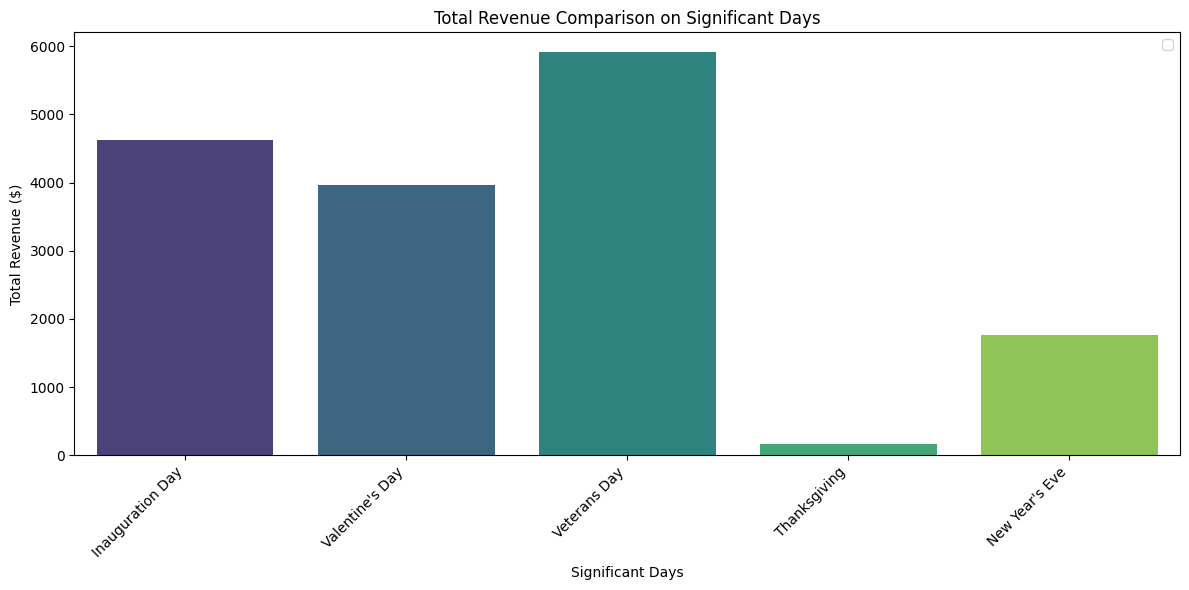

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Total'] = pd.to_numeric(df['Total'].replace('[\$,]', '', regex=True), errors='coerce')

significant_days = {
    '12-25': 'Christmas',
    '12-31': 'New Year\'s Eve',
    '01-01': 'New Year\'s Day',
    '02-14': 'Valentine\'s Day',
    '11-11': 'Veterans Day',
    '11-28': 'Thanksgiving',
    '01-20': 'Inauguration Day',
}

significant_data = df[df['Order Date'].dt.strftime('%m-%d').isin(significant_days.keys())]
total_sales_comparison = significant_data.groupby(significant_data['Order Date'].dt.strftime('%m-%d'))['Total'].sum().reset_index()
total_sales_comparison['Day Explanation'] = total_sales_comparison['Order Date'].map(significant_days)

plt.figure(figsize=(12, 6))
sns.barplot(x='Day Explanation', y='Total', data=total_sales_comparison, palette='viridis', hue='Day Explanation', dodge=False)
plt.title('Total Revenue Comparison on Significant Days')

plt.xlabel('Significant Days')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title=None)

plt.tight_layout()
plt.show()

## Plot - 3

In [7]:
def assign_label(avg_spending):
    if avg_spending < percentiles*0.5:
        return 'Economy'
    elif avg_spending > percentiles*1.5:
        return 'Premium'
    else:
        return 'Standard'
    
def assign_time_label(hour):
    if hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Evening'
    else:
        return 'Night'

In [6]:
customer_avg_spending = df.groupby('Last 4 Card Digits')['Total'].mean().reset_index()

percentiles = customer_avg_spending.Total.mean()
customer_avg_spending['Orderer Type'] = customer_avg_spending['Total'].apply(assign_label)
data=customer_avg_spending

data1 = df.merge(customer_avg_spending[['Last 4 Card Digits', 'Orderer Type']], on='Last 4 Card Digits', how='left')
df    = data1[['Last 4 Card Digits', 'Order Date', 'Menu Item', 'Qty', 'Total', 'Tip', 'Orderer Type']]

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Hour'] = df['Order Date'].dt.hour

df['Time of Day'] = df['Order Hour'].apply(assign_time_label)
person_max_label = df.groupby('Last 4 Card Digits')['Time of Day'].max().reset_index()
data1 = df.merge(person_max_label[['Last 4 Card Digits', 'Time of Day']], on='Last 4 Card Digits', how='left')
data1.drop(columns='Time of Day_y', inplace=True, errors='ignore')

revenue_by_ordertype = data1.groupby(['Orderer Type',"Time of Day_x"])['Total'].sum().reset_index()
revenue_by_ordertype

/tmp/ipykernel_15190/924893113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipykernel_15190/924893113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Hour'] = df['Order Date'].dt.hour
/tmp/ipykernel_15190/924893113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Orderer Type,Time of Day_x,Total
0,Economy,Evening,1495.10
1,Economy,Morning,7.63
2,Economy,Night,1295.06
3,Premium,Evening,4069.93
4,Premium,Morning,431.95
5,Premium,Night,5760.44
6,Standard,Evening,97686.65
7,Standard,Morning,5027.42
8,Standard,Night,115880.83


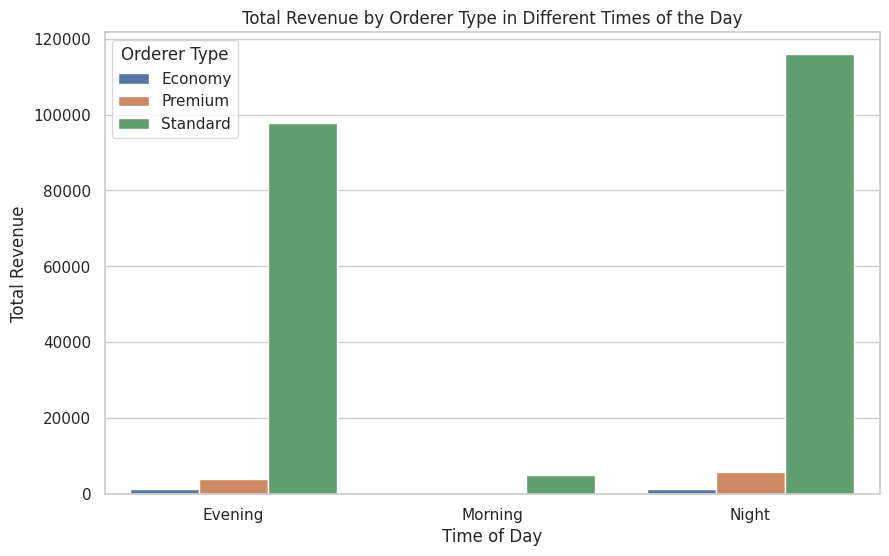

In [9]:
data = {
    'Orderer Type': ['Economy', 'Economy', 'Economy', 'Premium', 'Premium', 'Premium', 'Standard', 'Standard', 'Standard'],
    'Time of Day_x': ['Evening', 'Morning', 'Night', 'Evening', 'Morning', 'Night', 'Evening', 'Morning', 'Night'],
    'Total': [1495.10, 7.63, 1295.06, 4069.93, 431.95, 5760.44, 97686.65, 5027.42, 115880.83]
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x="Time of Day_x", y="Total", hue="Orderer Type", data=df)

plt.xlabel("Time of Day")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Orderer Type in Different Times of the Day")

plt.show()